In [67]:
%matplotlib inline
%run upload_and_vizualize 
%run classify_and_evaluate 
%run aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl


In [24]:
credit_data = read_file('credit-data.csv')
copy_data = credit_data.copy(deep=True)

In [25]:
df = des_num_dep(credit_data)

In [26]:
df

,NumberOfDependents,cumsum,percentage
0.0,86902,86902,59.490950
1.0,26316,113218,77.506230
2.0,19522,132740,90.870506
3.0,9483,142223,97.362332
4.0,2862,145085,99.321586
5.0,746,145831,99.832279
6.0,158,145989,99.940442
7.0,51,146040,99.975355
8.0,24,146064,99.991785
10.0,5,146069,99.995208


In [47]:
all_cols, all_cols_caps, pt_columns = list_describe(credit_data,'NumberOfTime')

            PersonID
count  150000.000000
mean    75000.500000
std     43301.414527
min         1.000000
25%     37500.750000
50%     75000.500000
75%    112500.250000
max    150000.000000 

       SeriousDlqin2yrs
count     150000.000000
mean           0.066840
std            0.249746
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000 

       RevolvingUtilizationOfUnsecuredLines
count                         150000.000000
mean                               6.048438
std                              249.755371
min                                0.000000
25%                                0.029867
50%                                0.154181
75%                                0.559046
max                            50708.000000 

                 age
count  150000.000000
mean       52.295207
std        14.771866
min         0.000000
25%        41.000000
50%        52.000000
75%        63.000000
max       109.000000 

  

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [28]:
print(all_cols_caps, all_cols)

{1: 'SeriousDlqin2yrs', 2: 'RevolvingUtilizationOfUnsecuredLines', 3: 'age', 4: 'zipcode', 5: 'NumberOfTime30-59DaysPastDueNotWorse', 6: 'DebtRatio', 7: 'MonthlyIncome', 8: 'NumberOfOpenCreditLinesAndLoans', 9: 'NumberOfTimes90DaysLate', 10: 'NumberRealEstateLoansOrLines', 11: 'NumberOfTime60-89DaysPastDueNotWorse', 12: 'NumberOfDependents'} {1: 'serious_dlqin2yrs', 2: 'revolving_utilization_of_unsecured_lines', 3: 'age', 4: 'zipcode', 5: 'number_of_time30-59_days_past_due_not_worse', 6: 'debt_ratio', 7: 'monthly_income', 8: 'number_of_open_credit_lines_and_loans', 9: 'number_of_times90_days_late', 10: 'number_real_estate_loans_or_lines', 11: 'number_of_time60-89_days_past_due_not_worse', 12: 'number_of_dependents'}


In [29]:
credit_data.MonthlyIncome.max()

3008750.0

(0, 11)

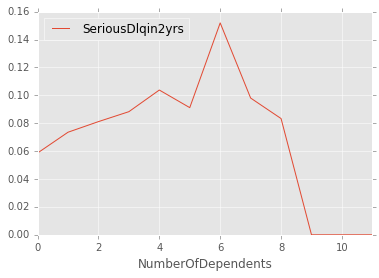

In [30]:
credit_data[['NumberOfDependents', 'SeriousDlqin2yrs']].groupby('NumberOfDependents').mean().plot()
plt.xlim(0,11)

/Users/andrewyaspan/Documents/capp30254/hws/HW2/upload_and_vizualize.py:110: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  df.boxplot(column=c_name, ax = ax2); ax2.set_title('Boxplot of '+c_name)


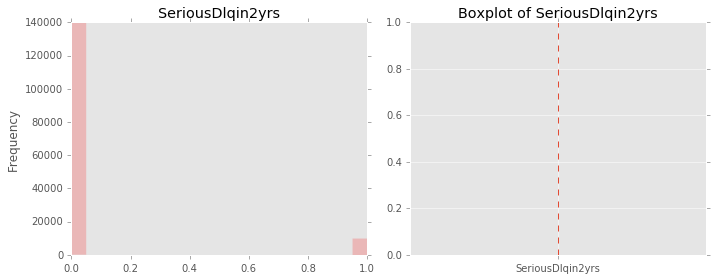

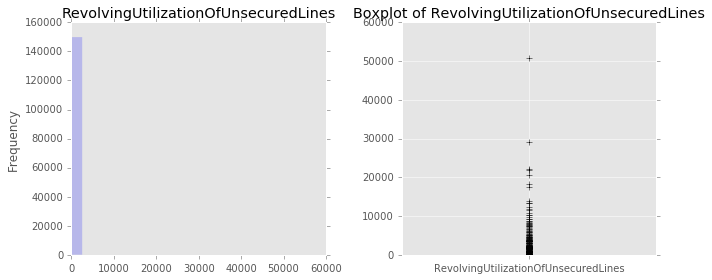

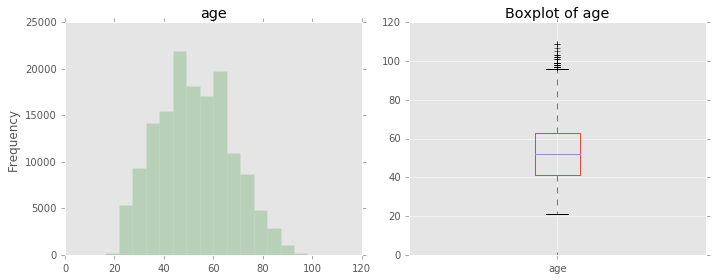

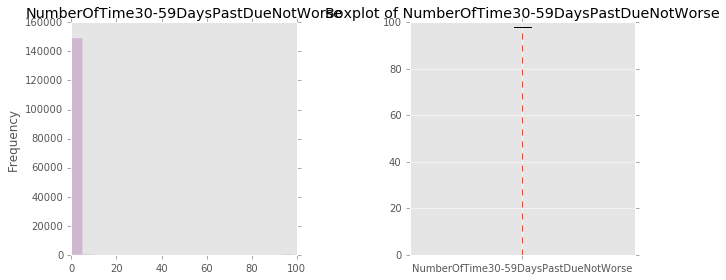

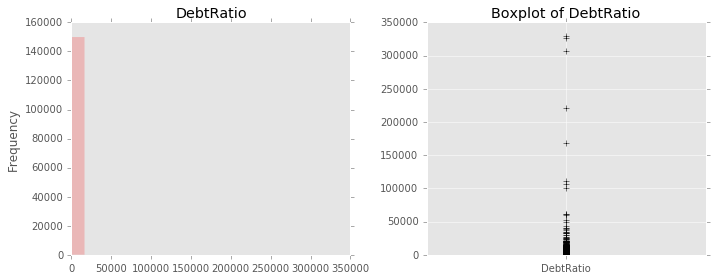

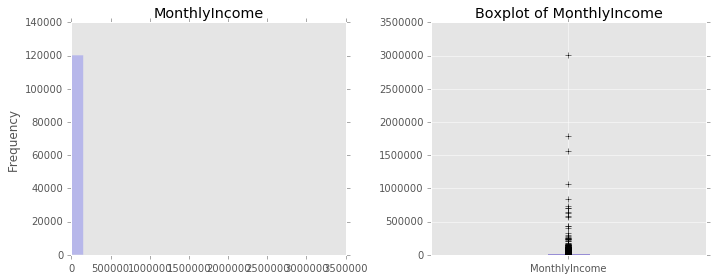

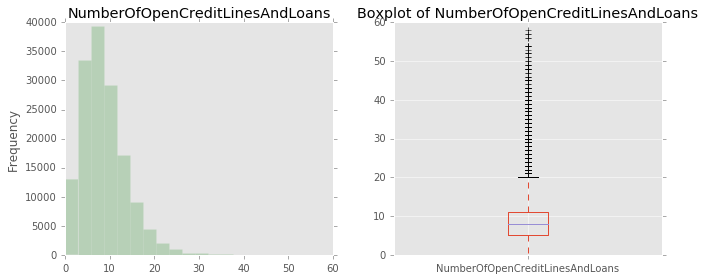

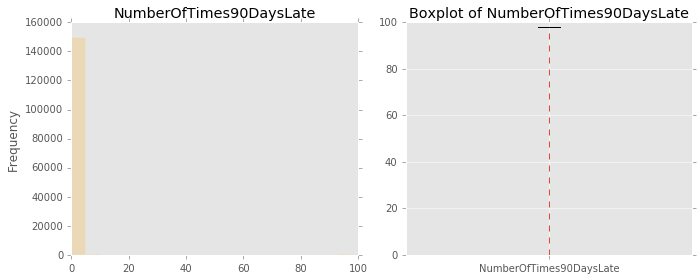

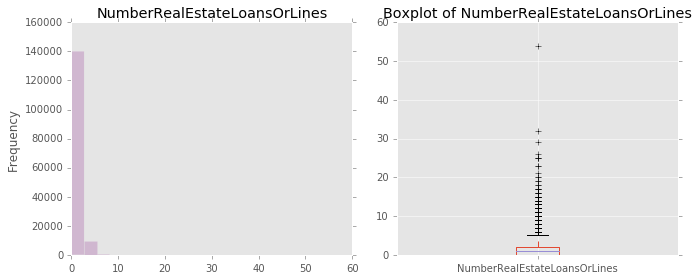

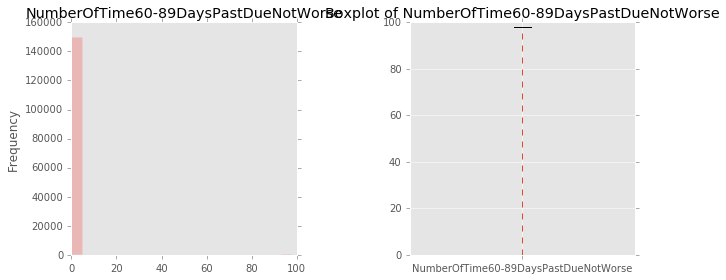

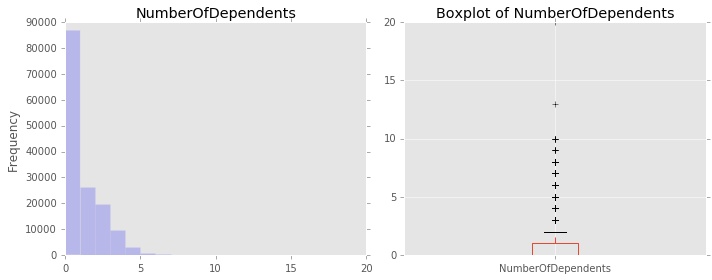

In [31]:
ignore_cols = ['zipcode']
create_hist_box(credit_data,all_cols_caps,ignore_cols)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


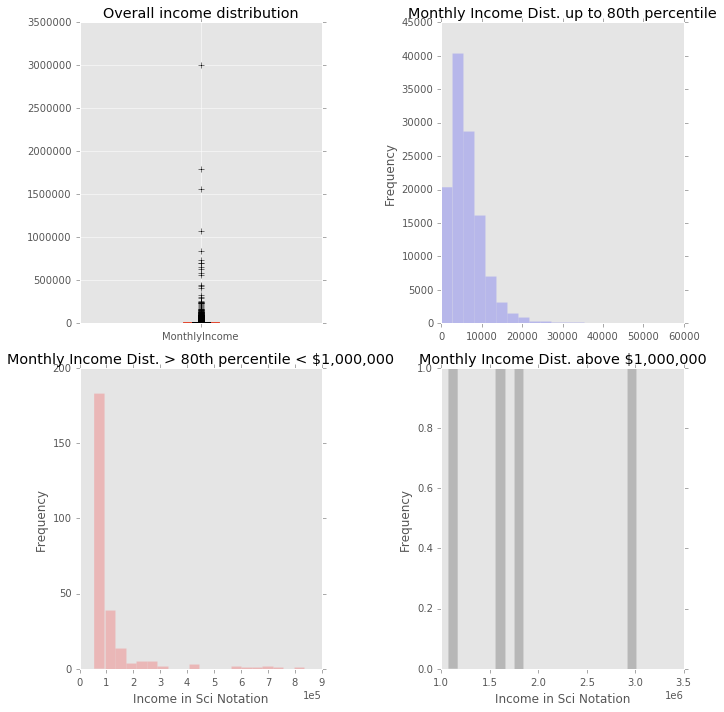

In [32]:

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize=(10,10))
# Overall Income Distribution
credit_data.boxplot(column='MonthlyIncome', ax = ax1); ax1.set_title('Overall income distribution')
# Up to 80th percentile
credit_data.MonthlyIncome[(credit_data['MonthlyIncome']<=54166)].plot(kind = "hist", alpha = 0.2, color ='blue', bins= 20, ax = ax2); 
ax2.set_title('Monthly Income Dist. up to 80th percentile');
ax2.grid()

# Monthly income above $54,166 and below $1,000,000
credit_data.MonthlyIncome[(credit_data['MonthlyIncome']> 54166) & (credit_data['MonthlyIncome']<=1000000)].plot(kind = "hist", alpha = 0.2, color ='r', bins= 20, ax = ax3); 
ax3.set_title('Monthly Income Dist. > 80th percentile < $1,000,000');
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax3.set_xlabel('Income in Sci Notation')
ax3.grid()
# Income distribution above $1,000,000
credit_data.MonthlyIncome[(credit_data['MonthlyIncome']>1000000)].plot(kind = "hist", alpha = 0.2, color ='black', bins= 20, ax = ax4); 
ax4.set_title('Monthly Income Dist. above $1,000,000');
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax4.set_xlabel('Income in Sci Notation')
ax4.grid()
plt.tight_layout()

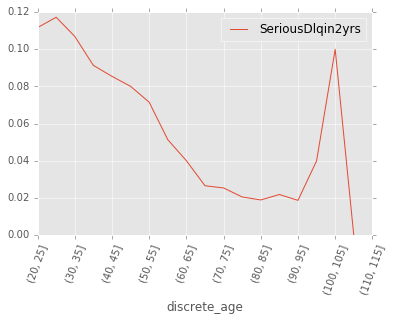

In [48]:
age_ranges = range(20,120,5)
income_ranges = range(0,120000,10000)

create_line_graphs(credit_data,'age',age_ranges)

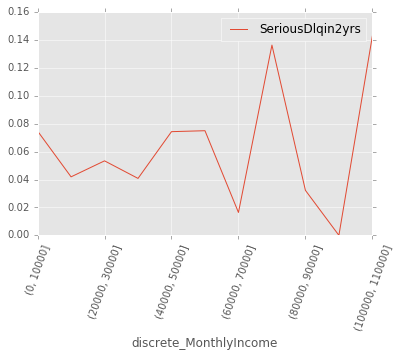

In [49]:

create_line_graphs(credit_data,'MonthlyIncome',income_ranges)


At this point, it seems useful to inspect the distribution of the data by column

In [50]:
cross_vectors(credit_data, 'NumberOfDependents', 'SeriousDlqin2yrs')

SeriousDlqin2yrs,0,1
NumberOfDependents,,
0.0,81807,5095
1.0,24381,1935
2.0,17938,1584
3.0,8646,837
4.0,2565,297
5.0,678,68
6.0,134,24
7.0,46,5
8.0,22,2


In [51]:
data_dict =read_file('Data Dictionary.xls')

In [52]:
data_dict

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,zipcode,zipcode of the borrower,interget/string
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


NOTE: All that are missing monthly_income are also missing number of dependents

In [53]:
null_monthly_income_or_null_dependents = credit_data[credit_data.MonthlyIncome.isnull()| credit_data.NumberOfDependents.isnull()]
null_monthly_income_alone = credit_data[credit_data.MonthlyIncome.isnull()]


In [54]:
check_diff(null_monthly_income_alone,null_monthly_income_or_null_dependents)

0

In [55]:
credit_data.NumberOfDependents.median()

0.0

In [56]:
#split data before imputation
np.random.seed(seed=20)
test_set = np.random.uniform(0,1,len(credit_data)) > .75
X_train = credit_data[test_set==False].ix[:,1:]
X_train['age'].replace(0, X_train['age'].mean(), inplace = True)
X_test = credit_data[test_set==True].ix[:,1:]
y_train = credit_data[test_set==False].ix[:,1]
y_test = credit_data[test_set==True].ix[:,1]

In [57]:
###NEED TO DO THIS FOR TEST AND TRAIN

#impute by the median
credit_imputed_train = preprocess_imputer(X_train)
credit_imputed_test = preprocess_imputer(X_test)
credit_imputed_train = pd.DataFrame(credit_imputed_train).rename(columns = all_cols).drop(['serious_dlqin2yrs','zipcode'],axis=1)
credit_imputed_test = pd.DataFrame(credit_imputed_test).rename(columns = all_cols).drop(['serious_dlqin2yrs','zipcode'],axis=1)

In [58]:
credit_imputed_train.head()

,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
2,0.213179,74.0,0.0,0.375607,3500.0,3.0,0.0,1.0,0.0,1.0
3,0.305682,57.0,0.0,5710.000000,5400.0,8.0,0.0,3.0,0.0,0.0
4,0.754464,39.0,0.0,0.209940,3500.0,8.0,0.0,0.0,0.0,0.0


According to the following article: #https://www.consumerfinance.gov/askcfpb/1791/what-debt-income-ratio-why-43-debt-income-ratio-important.html
having a debt-income-ratio below 43% is ideal. So I made this column, but was reluctant to use it in the model.

In [59]:
#http://www.investopedia.com/university/ratios/debt/ratio2.asp

group_names = ['dr_very_low','dr_low','dr_moderately_low','dr_slightly_high','dr_high','dr_extremely_high']
bins = [float(-1),float(.20),float(.40),float(.60),float(.80),float(1.00),float(329665)]

credit_imputed_train_copy = credit_imputed_train.copy(deep=True)
credit_imputed_test_copy = credit_imputed_test.copy(deep=True)
credit_imputed_train_w_binned = credit_imputed_train_copy
credit_imputed_train_w_binned['dr_category'] = pd.cut(credit_imputed_train.debt_ratio, bins, labels=group_names)
credit_imputed_test_w_binned = credit_imputed_test_copy
credit_imputed_test_w_binned['dr_category'] = pd.cut(credit_imputed_test.debt_ratio, bins, labels=group_names)


According to the following source: http://www.creditcards.com/credit-card-news/credit-utilization-fico-1270.php. It is good to have a revolving utilization rate below 30%.  So I made this column, but was reluctant to use it in the model.

In [60]:

group_names = ['rvus_low','rvus_moderately_low', 'rvus_high','rvus_extremely_high']
bins = [float(-1),float(.33),float(.66),float(1.00),float(507089)]


credit_imputed_train_w_binned['rvus_category'] = pd.cut(credit_imputed_train.revolving_utilization_of_unsecured_lines, bins, labels=group_names)

credit_imputed_test_w_binned['rvus_category'] = pd.cut(credit_imputed_test.revolving_utilization_of_unsecured_lines, bins, labels=group_names)

In [61]:
credit_imputed_train['monthly_income'] = StandardScaler().fit_transform(credit_imputed_train['monthly_income'])
credit_imputed_test['monthly_income'] = StandardScaler().fit_transform(credit_imputed_test['monthly_income'])

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X

In [62]:
# from sklearn.linear_model import LinearRegression

# regressor = LinearRegression()
# regressor.fit(credit_imputed_train, y_train)

In [63]:
# y_pred = regressor.predict(credit_imputed_test)

In [64]:
credit_imputed_train.head(1)

,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0.766127,45.0,2.0,0.802982,0.202673,13.0,0.0,6.0,0.0,2.0


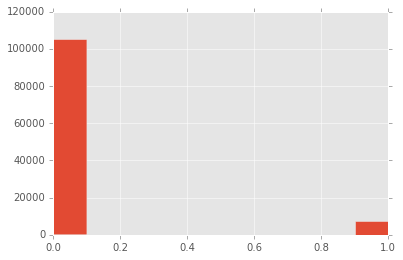

In [65]:
y_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1046485f8>]], dtype=object)

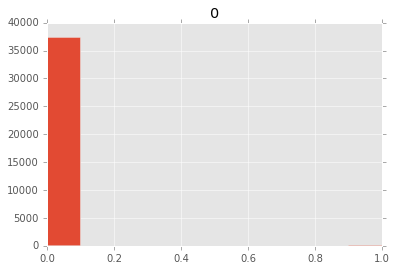

In [71]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
rfe = RFE(regressor)
fit = rfe.fit(credit_imputed_train, y_train)
#predicted = rfe.predict(credit_imputed_train)
y_pred = rfe.predict(credit_imputed_test)
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.hist()

In [72]:
accuracy(y_test, df_y_pred)

0.93234824281150164